In [1]:
from google.colab import files
uploaded = files.upload()

Saving ready_for_training.csv to ready_for_training.csv


In [2]:
import pandas as pd

df = pd.read_csv('ready_for_training.csv')

df.head()

,num_hyperlinks,num_uncommon_tld_urls,num_ip_urls,body_char_count,subject_char_count,urgency_keyword_count,num_capital_words,special_char_ratio,has_javascript,has_form_tag,processed_text,label
0,0,0,0,1442.0,61.0,0,0,0.071809,0,0,disco future meeting agenda material unless se...,0
1,0,0,0,703.0,14.0,0,0,0.029248,0,0,friday deskheads would like hour team building...,0
2,0,0,0,27.0,3.0,0,0,0.032258,0,0,mpc think,0
3,0,0,0,216.0,24.0,0,0,0.029046,0,0,priority legislation understanding languishing...,0
4,6,0,0,861.0,32.0,1,0,0.119687,0,0,payment detail update required netflix account...,1


In [3]:
!pip install scikit-learn matplotlib

Accuracy: 0.9389233954451346
Precision: 0.783427495291902
Recall: 0.538163001293661
F1 Score: 0.6380368098159509
AUC: 0.8979088447913633


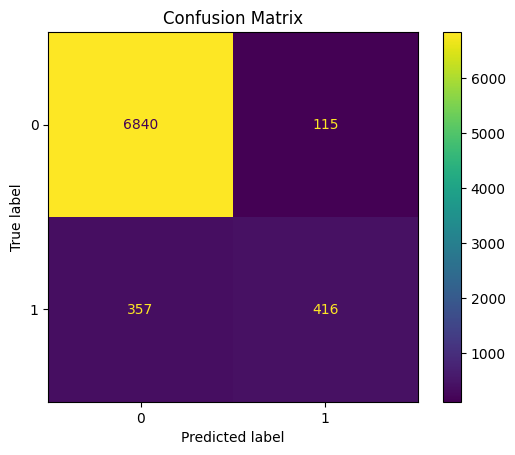

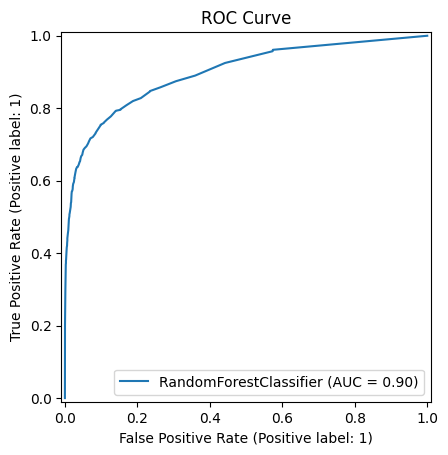

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score (CV): 0.636351359688781


In [4]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

# 2. Load data
df = pd.read_csv("ready_for_training.csv")  # Make sure CSV is in the same directory as this notebook

# 3. Feature and label selection (drop label and text column)
X = df.drop(columns=['label', 'processed_text'])
y = df['label']

# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Train basic Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

# 7. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# 8. ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# 9. Hyperparameter Optimization (Grid Search)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)
